In [1]:
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import File

In [2]:
def graph(file):
    df = import_file(file)
    plot(df,file)

def import_file(file):
    colnames = ["Wavelength (um)","Flux (Jy)","Statistical Error (Jy)"]
    df = pd.read_csv(file,sep='\s+',skiprows=19,names=colnames)
    return df

def plot(df,file):
    #plot
    fig=plt.figure(1,figsize=(10,6))
    ax1=fig.add_subplot(111)
    ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    
    ax1.set_xlim(2.7,4)
    ax1.set_ylim(-1,10)
    
    ax1.set_xlabel("Wavelength (um)",fontsize=16)
    ax1.set_ylabel("Flux (Jy)",fontsize=16)
    ax1.set_title(file,fontsize=18)
    

Text(0.5, 1.0, 'ChaINa2_L_06-05-2002.ascii')

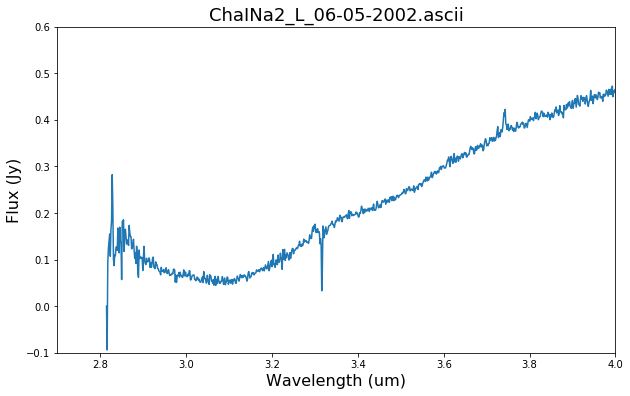

In [3]:
file = "ChaINa2_L_06-05-2002.ascii"
df = import_file(file)
#plot(df,file)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    
#ax1.set_xlim(4.17,4.25)
ax1.set_xlim(2.7,4)
ax1.set_ylim(-0.1,0.6)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)

In [4]:
df

,Wavelength (um),Flux (Jy),Statistical Error (Jy)
0,2.81430,0.000000,0.094024
1,2.81577,-0.093840,0.069721
2,2.81725,0.093229,0.036401
3,2.81872,0.124195,0.028872
4,2.82020,0.139689,0.028824
...,...,...,...
1019,4.23960,-0.096066,2.674610
1020,4.24083,0.668309,8.261090
1021,4.24205,2.783880,9.573980
1022,4.24328,4.600950,3.189940


In [5]:
file_names = ["ChaINa2_L_06-05-2002.ascii",
              "ChaIRN_1301_jan_L.ascii",
              "ChaIRN_jan_L.ascii",
              "CRBR2422_L_02-05-2002.ascii",
              "EC82_L_07-05-2002.ascii",
              "EC90A_L_07-05-2002.ascii",
              "EC90B_L_07-05-2002.ascii",
              "Elias32_L_02-05-2002.ascii",
              "GL961E_jan_L.ascii",
              "GL961W_jan_L.ascii",
              "GL989_jan_L.ascii",
              "GSS30IRS1_L_12-09-2001.ascii",
              "HH100_L.ascii",
              "HH46_L.ascii",
              "HH46_L_TOTAL.ascii",
              "HH54_L.ascii",
              "IRAS08211_jan_L.ascii",
              "IRAS08261_jan_L.ascii",
              "IRAS08375_L.ascii",
              "IRAS08375A_1301_jan_L.ascii",
              "IRAS08375B_1301_jan_L.ascii",
              "IRAS08448_jan_L.ascii",
              "IRAS08470_jan_L.ascii",
              "IRAS09017_jan_L.ascii",
              "IRAS11068_jan_L.ascii",
              "IRS42_L_13-08-2001.ascii",
              "IRS43_L_02-05-2002.ascii",
              "IRS44_L_02-05-2002.ascii",
              "IRS46_L_02-05-2002.ascii",
              "IRS48_L_05-05-2002.ascii",
              "IRS51_L_03-09-2001.ascii",
              "IRS54_L_05-05-2002.ascii",
              "IRS63_L_21-08-2001.ascii",
              "L1489_jan_L.ascii",
              "L1489_L_23-08-2002.ascii",
              "LLN20_L_15-11-2001.ascii",
              "LLN33_L_13-11-2001.ascii",
              "LLN47_L_11-11-2001.ascii",
              "LMCP2_L_15-11-2001.ascii",
              "NGC3576A_L_06-05-2002.ascii",
              "NGC3576B_L_06-05-2002.ascii",
              "RCRAIRA5A_L_07-05-2002.ascii",
              "RCRAIRA5B_L_07-05-2002.ascii",
              "RCRAIRS7A_L_04-07-2002.ascii",
              "RCRAIRS7B_L_04-07-2002.ascii",
              "Reipurth50_L.ascii",
              "SVS4-10_L.ascii",
              "SVS4-12_L.ascii",
              "SVS4-2_L.ascii",
              "SVS4-3_L.ascii",
              "SVS4-4_L.ascii",
              "SVS4-5_L_07-05-2002.ascii",
              "SVS4-6_L.ascii",
              "SVS4-7_L.ascii",
              "SVS4-8_L.ascii",
              "SVS4-9_L_07-05-2002.ascii",
              "T42_L.ascii",
              "TPSC1_L_13-11-2001.ascii",
              "TPSC78_L_13-11-2001.ascii",
              "VSSG17_L_02-05-2002.ascii",
              "VSSG1_L_07-05-2001.ascii",
              "VVSer_set1_L.ascii",
              "W33A_L_04-08-2001.ascii",
              "WL12_L_07-05-2002.ascii",
              "WL16_L_07-05-2002.ascii",
              "WL20_L_02-05-2002.ascii",
              "WL20E_L_02-05-2002.ascii"]

Text(0.5, 1.0, 'ChaINa2_L_06-05-2002.ascii')

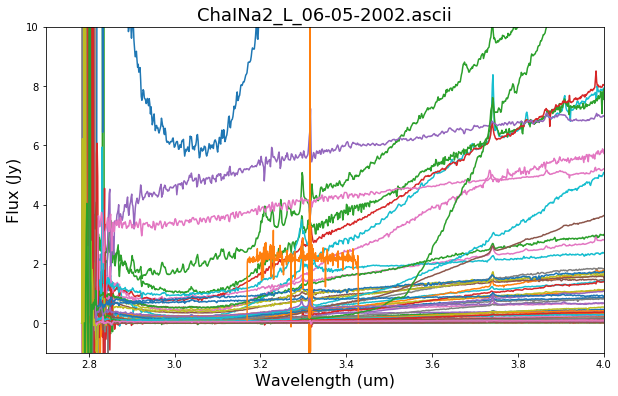

In [6]:
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
for name in file_names:
    df = import_file(name)
    ax1.plot(df["Wavelength (um)"],df["Flux (Jy)"])
    
ax1.set_xlim(2.7,4)
ax1.set_ylim(-1,10)

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux (Jy)",fontsize=16)
ax1.set_title(file,fontsize=18)

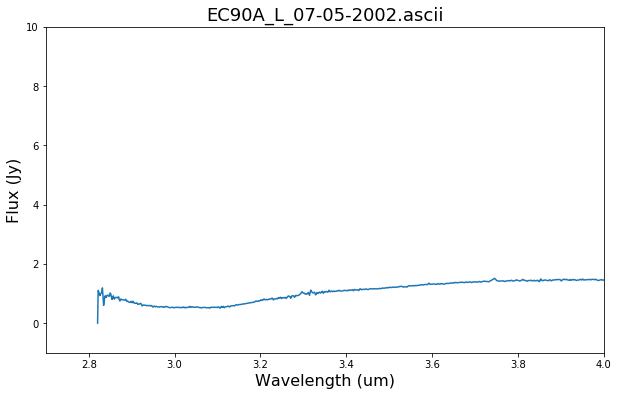

In [7]:
graph(file_names[5])

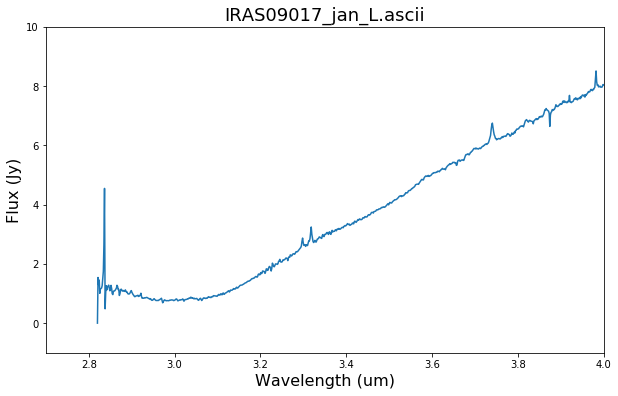

In [8]:
graph(file_names[23])